<a href="https://colab.research.google.com/github/mssahumanisha/Numpy/blob/main/Linear_Regression_1000_companies_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression model of 1000 companies

**<a href="https://colab.research.google.com/drive/1U-YrmtfbB3ZcdxuQBnyhxGoTtGD7Wvzc?usp=sharing">Collab Notebook Link</a>**

The dependent features are:

1) R&D Spend (X1)

2) Administration (X2)

3) Marketing Spend (X3)

The independent feature is:

1) Profit (Y)

Objective:

To predict the profit of the company.


In [1]:
#downloads files, for collab users
!rm -rdf *
!pip install gdown
!gdown https://drive.google.com/uc?id=1fDHzphHijNnZNnwa3F3hEY90mB00sNGy

Downloading...
From: https://drive.google.com/uc?id=1fDHzphHijNnZNnwa3F3hEY90mB00sNGy
To: /content/1000_Companies.csv
100% 51.2k/51.2k [00:00<00:00, 17.3MB/s]


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#reading the csv file
df=pd.read_csv("1000_Companies.csv")

In [7]:
#printing the first 8 rows of the dataframe
df.head(10)
#print ending rows
#print 8 to 25 rows


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
#datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [10]:
#finding the no. of rows and columns
df.shape

#df.size

(1000, 5)

In [11]:
#finding the statistical overview of all features like mean, max, min,etc
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [63]:
#finding the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int64  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [64]:
#finding the names of columns
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
# Checking if dataset in Empty
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

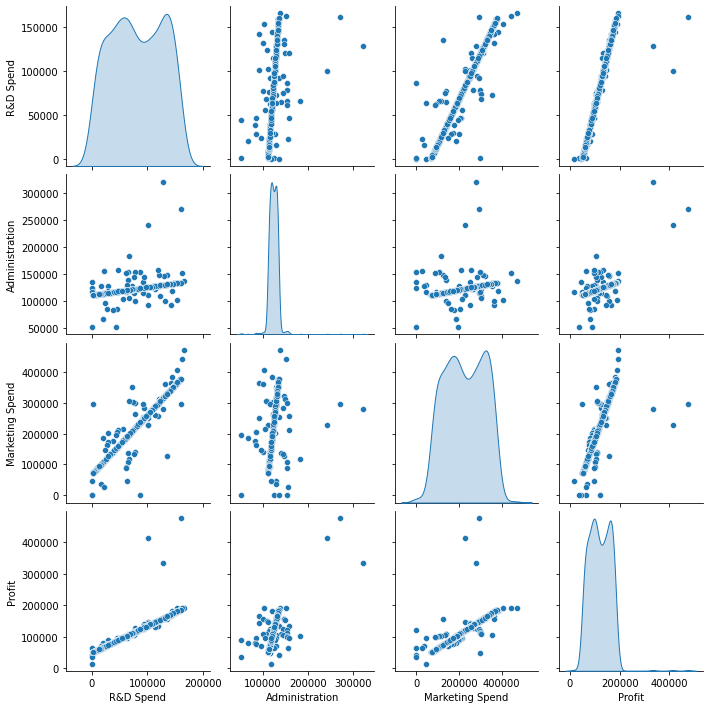

In [14]:
# Pairplot with seaborn
sns.pairplot(df,diag_kind='kde')

### Heatmap allows us to find how closely different features are related to each other



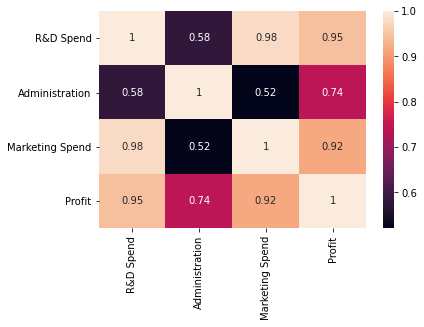

In [15]:
#finding the correlation among the features with seaborn heatmap
sns.heatmap(df.corr(),annot=True)

In [17]:
# the state column has categorical values in object datatype
df['State']

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [22]:
df['State'].value_counts()

0    344
2    334
1    322
Name: State, dtype: int64

In [20]:
#Convert Categorical column of state which is in words to numbers

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["State"] = encoder.fit_transform(df["State"])
df['State']

0      2
1      0
2      1
3      2
4      1
      ..
995    0
996    0
997    0
998    0
999    2
Name: State, Length: 1000, dtype: int64

In [21]:
df['State'].value_counts()

0    344
2    334
1    322
Name: State, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int64  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [19]:

"""

def func(i):
   if i == 'California':
     return  0
   elif i == 'New York':
     return  1
   else:
     return  2
   
  
     
df['State'] = df['State'].apply(func) 

"""

 




"\n\ndef func(i):\n   if i == 'California':\n     return  0\n   elif i == 'New York':\n     return  1\n   else:\n     return  2\n   \n  \n     \ndf['State'] = df['State'].apply(func) \n\n"

### Imp step: Seperating data into features and labels

In [27]:
#features 
#everything except profit
#keep everyting and drop profit column
x = df.drop('Profit',axis=1)

In [28]:
#labels
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [29]:
#features head
#labels head
y=df['Profit']

In [30]:
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

## Split features and labels into training data and test data

In [50]:
# 0.3 means splitting data into 70 and 30.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=40 )

In [51]:
print(x_train.shape)
print(x_test.shape)

(700, 4)
(300, 4)


In [35]:
print(y_train.shape)
print(y_test.shape)

(700,)
(300,)


# Training the model

In [41]:
#import thelinear regression  algorithm
from sklearn.linear_model import LinearRegression


In [52]:
#call the linear regression function
reg=LinearRegression()

In [53]:
#train the model
#Using the fit function to train the model on traning data
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#predict the test data
y_pred = reg.predict(x_test)

In [55]:
#values of y_pred
#length of y_pred
y_pred[len(y_pred)-10:]

array([ 59568.49197396,  76924.79790254, 130029.71031107, 170424.85455809,
       137306.17726906, 127986.29445912,  82480.40816062, 151681.59669608,
        88134.89766828, 105546.59326242])

In [70]:
y_test.tail(10)

398     59636.36364
46      49490.75000
120    129480.66330
122    169404.26190
225    136575.55310
750    127455.13840
876     82229.80752
426    150707.24090
723     87716.92100
53     104976.16960
Name: Profit, dtype: float64

In [56]:
len(y_pred)

300

In [57]:
#our own data points
len(y_test)

300

In [61]:
reg.predict([[23000,500000,40000,1]])

array([482921.22926721])

### for one feature y= mx+c
### printing the coefficients of y=m+ c1x1+ c2x2 + c3x3+cx4

In [62]:
#coefficient
reg.coef_

array([5.19929178e-01, 1.09017730e+00, 9.37576298e-02, 1.18909617e+02])

# Checking accuracy of the model

In [66]:
#Metrics we will use for accuracy prediction

from sklearn.metrics import mean_squared_error, r2_score


In [67]:
mean_squared_error(y_pred,y_test)


27115065.518946603

In [68]:
#r2_score()
r2_score(y_pred,y_test)

0.9837046082549825